# NWB use-case pvc-7

--- Data courtesy of Aleena Garner, Allen Institute for Brain Sciences ---

Here we demonstrate how data from the NWB pvc-7 use-case can be stored in NIX files.

### Context:
- *In vivo* calcium imaging of layer 4 cells in mouse primary visual cortex.
- Two-photon images sampled @ 30 Hz
- Visual stimuli of sinusoidal moving gratings were presented.


- In this example, we use a subset of the original data file.
- We only use image frames 5000 to frame 6000.
- Image data was 10 times down-sampled.

In [1]:
from nixio import *
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from utils.notebook import print_stats
from utils.plotting import Plotter

## Open a file and inspect its content

In [2]:
f = File.open("data/pvc-7.nix.h5", FileMode.ReadOnly)

print_stats(f.blocks)


Blocks                                             (01)
	type: pvc-7                                (01)


In [3]:
block = f.blocks[0]

print_stats(block.data_arrays)
print_stats(block.tags)


DataArrays                                         (05)
	type: runspeed                             (01)
	type: movie                                (02)
	type: stimulus                             (01)
	type: imaging                              (01)

Tags                                               (01)
	type: recording                            (01)


## Explore Stimulus

In [4]:
# get recording tag
recording = block.tags[0]

# stimulus combinations array
stimulus = recording.features[0].data

In [5]:
# display the stimulus conditions
for label in stimulus.dimensions[0].labels:
    print label + ' :',
print '\n'

# actual stimulus condition values
for cmb in stimulus.data[:]:
    for x in cmb:
        print "%.2f\t" % x,
    print '\n'

orientation : SF : TF : contrast : 

90.00	0.02	1.00	0.80	

135.00	0.16	2.00	0.80	

270.00	0.32	1.00	0.80	

45.00	0.02	4.00	0.80	

270.00	0.08	1.00	0.80	

225.00	0.08	4.00	0.80	



In [6]:
# get particular stimulus combination
index = 2
print "a stimulus combination %s" % str(stimulus.data[index])

a stimulus combination [ 270.      0.32    1.      0.8 ]


In [7]:
# find out when stimulus was displayed
start = recording.position[index]
end = recording.extent[index]

print "was displayed from frame %d to frame %d" % (start, end)

was displayed from frame 5314 to frame 5404


## Explore video and imaging data

In [8]:
# get movie arrays from file
movies = filter(lambda x: x.type == 'movie', recording.references)
print_stats(movies)


DataArrays                                         (02)
	type: movie                                (02)


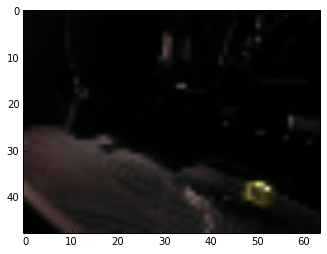

In [9]:
# get mouse image at the beginning of the selected stimulus
mouse = movies[1]
image_index = int(np.where(np.array(mouse.dimensions[0].ticks) > start)[0][0])

plt.imshow(mouse.data[image_index])

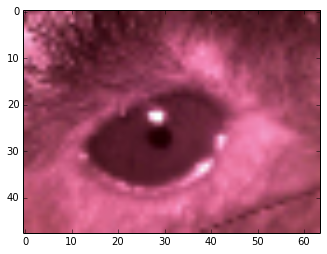

In [10]:
# get eye image at the end of the selected stimulus
eye = movies[0]
image_index = int(np.where(np.array(eye.dimensions[0].ticks) > end)[0][0])

plt.imshow(eye.data[image_index])

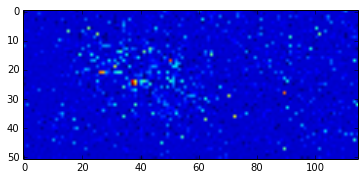

In [11]:
# get 2-photon image at the beginning of the selected stimulus
imaging = filter(lambda x: x.type == 'imaging', recording.references)[0]

image_index = int(np.where(np.array(imaging.dimensions[0].ticks) > start)[0][0])

plt.imshow(imaging.data[image_index])

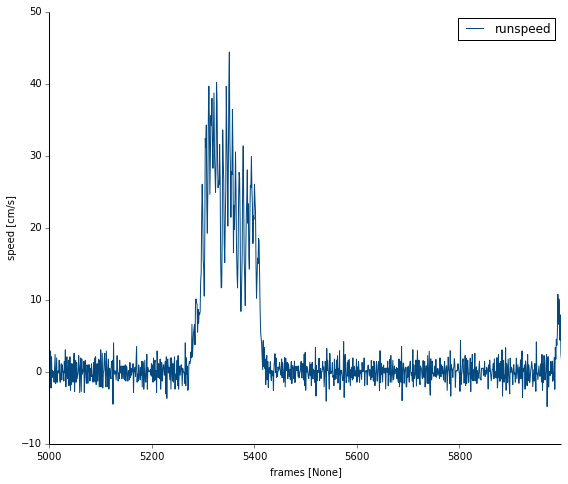

In [12]:
# plot mouse speed in the whole window (TODO: add stimulus events)
speeds = filter(lambda x: x.type == 'runspeed', recording.references)[0]

p = Plotter()
p.add(speeds)
p.plot()

In [13]:
f.close()